## Unit test


In [1]:
from pathlib import Path
import os

import imfcsoutputhandlerlib.plotter
import imfcsoutputhandlerlib.imfcs_util.saved_excel_reader as imfcsread
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import time
import pandas as pd
import os
from openpyxl import load_workbook

In [2]:
DIRNAME = "input/input_mef-dii-oa-batch"

fn_excel = (
    "tirfmh29_241018_11_w1_cell5_WT_DiI100nM-30min_p62_a63d20_561nm_588uW_pt1.xlsx"
)
fn_avr = "tirfmh29_241018_11_w1_cell5_WT_DiI100nM-30min_p62_a63d20_561nm_588uW_AVR.tif"

xy_coordinate = [38, 29, 12, 15]  # x-start, y-start, width, height

In [3]:
current_dir = Path().resolve()
input_path = Path(os.path.join(current_dir.parent, DIRNAME))

In [4]:
path_excel = os.path.join(input_path, fn_excel)
path_avr = os.path.join(input_path, fn_avr)

In [5]:
df = imfcsread.read_excel_imfcs_saved(path_excel=path_excel)
panel_param = ["Image width", "Image height", "Binning X", "Binning Y", "Overlap"]
param_dict = imfcsread.get_param(excel_data=df, panel_param=panel_param)
lagtimes = imfcsread.get_lagtimes(excel_data=df)

In [6]:
acf1 = imfcsread.get_cfs(
    excel_data=df,
    width=int(param_dict["Image width"]),
    height=int(param_dict["Image height"]),
    num_lag=lagtimes.shape[0],
    sheet_name="ACF1",
)

sd1 = imfcsread.get_cfs(
    excel_data=df,
    width=int(param_dict["Image width"]),
    height=int(param_dict["Image height"]),
    num_lag=lagtimes.shape[0],
    sheet_name="SD (ACF1)",
)
fit1 = imfcsread.get_cfs(
    excel_data=df,
    width=int(param_dict["Image width"]),
    height=int(param_dict["Image height"]),
    num_lag=lagtimes.shape[0],
    sheet_name="Fit functions (ACF1)",
)
fit1_param = imfcsread.get_fit_param(
    excel_data=df,
    width=int(param_dict["Image width"]),
    height=int(param_dict["Image height"]),
    sheet_name="Fit Parameters (ACF1)",
)
fit1_results = imfcsread.get_fit_results(
    excel_data=df,
    width=int(param_dict["Image width"]),
    height=int(param_dict["Image height"]),
    sheet_name="Fit Parameters (ACF1)",
)
fit1_results[:, :, 2] *= 10**12

file_path = (
    "path_to_your_tiff_stack.tif"  # Replace with the actual path to your TIFF file
)
avr_intensity = tifffile.imread(path_avr)

In [7]:
fig = None
gs = None

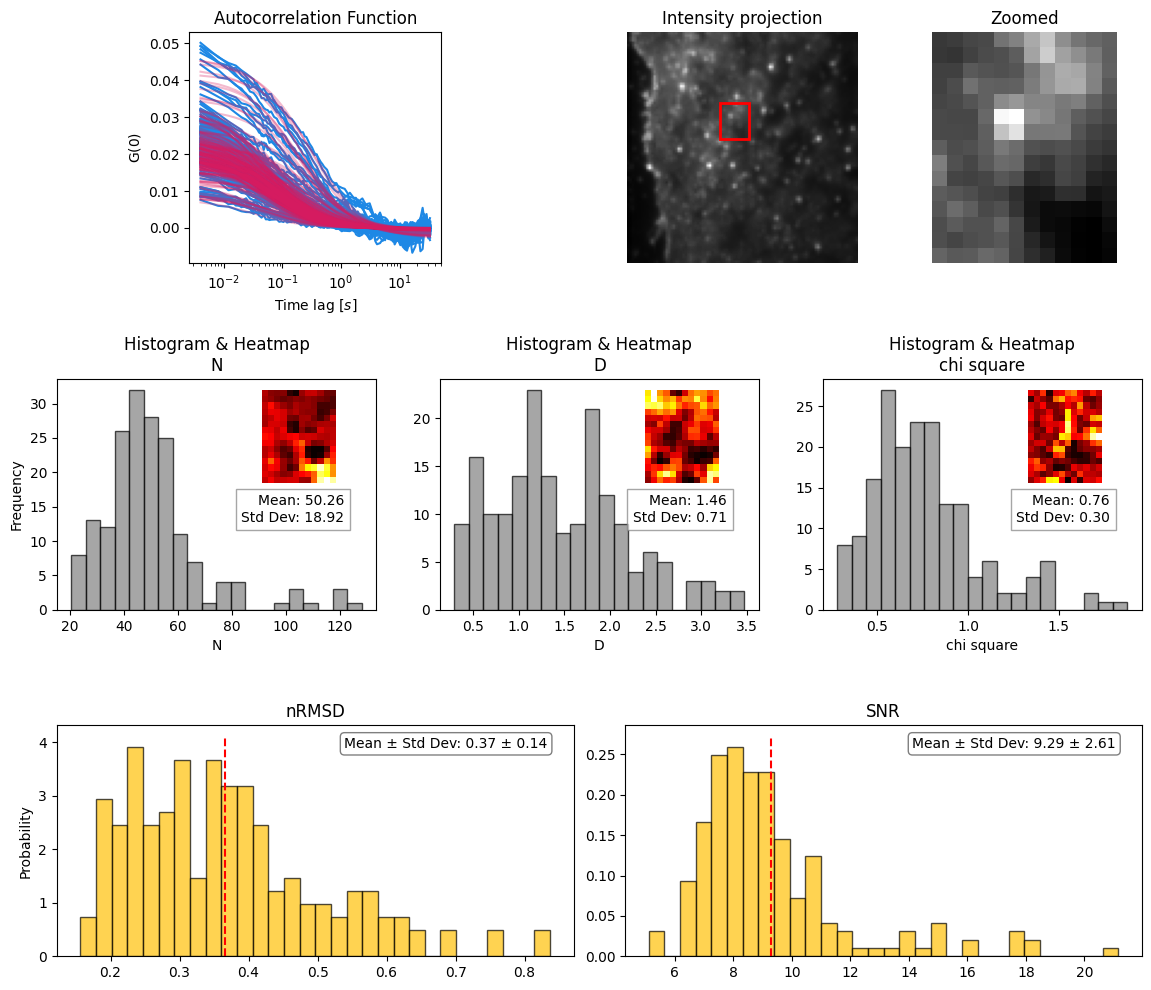

In [8]:
imfcsoutputhandlerlib.plotter.plot_combined_analysis_imfcs(
    fig=fig,
    gs=gs,
    acf=acf1,
    lag=lagtimes,
    fit=fit1,
    avr_intensity=avr_intensity,
    xy_coordinate=xy_coordinate,
    fit_res=fit1_results,
    index=0,
    is_plot_with_fit=True,
    indices_histogram_pmap=[1, 2, 12],
    labels_histogram_pmap=["N", "D", "chi square"],
    output=None,
)